In [1]:
import urllib.request
import gensim.models as gnm
import networkx as nx
import os
import logging

In [2]:
def open_model(m, url):
    folder_list = os.listdir()
    if m not in folder_list:
        urllib.request.urlretrieve(url, m)
    if m.endswith('.vec.gz'):
        model = gnm.KeyedVectors.load_word2vec_format(m, binary=False)
    elif m.endswith('.bin.gz'):
        model = gnm.KeyedVectors.load_word2vec_format(m, binary=True)
    else:
        model = gnm.KeyedVectors.load(m)
    return model

In [3]:
url = "http://rusvectores.org/static/models/"
url += "rusvectores2/ruscorpora_mystem_cbow_"
url += "300_2_2015.bin.gz"
m = "ruscorpora_mystem_cbow_300_2_2015.bin.gz"

In [4]:
def surrounding(model, word, stops):
    global_list = list()
    for i in model.most_similar(positive=[word], topn=15):
        if i[1] >= 0.5 and i[0].endswith('_S'):
            if i[0] not in stops:
                edge = (word, i[0], i[1])
                global_list.append(edge)
    return global_list

In [5]:
def semframe(model):
    kword = 'овощ_S'
    stops = [kword]
    gl_list = surrounding(model, kword, stops)
    step1 = gl_list.copy()
    for edge in step1:
        word = edge[1]
        stops.append(word)
        step2 = surrounding(model, word, stops)
        gl_list.extend(step2)
    return gl_list

In [6]:
def wordsid(gl_list):
    words = []
    for tup in gl_list:
        for item in tup:
            if isinstance(item, str):
                if item not in words:
                    words.append(item)
    return words

In [36]:
def graphmaker(gl_list, w_list):
    G = nx.Graph()
    for key in w_list:
        G.add_node(key[:-2])
    for tup in gl_list:
        n1 = tup[0][:-2]
        n2 = tup[1][:-2]
        wg = tup[2] * 5
        G.add_edge(n1, n2, weight=wg)
    return G

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [24]:
def graphdrawer(G):
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='red', node_size=20) 
    nx.draw_networkx_edges(G, pos, edge_color='yellow')
    ff = 'Roboto'
    nx.draw_networkx_labels(G, pos, font_size=45, font_family=ff)
    plt.rcParams["figure.figsize"] = (80, 60)
    plt.axis('off') 
    plt.show()

In [10]:
def graphanalyzer(G):
    message = 'graph parameters\n'
    chars1 = ['degree ', 'closeness ', 'betweenness ', 'eigen']
    param1 = []
    deg = nx.degree_centrality(G)
    p = sorted(deg, key=deg.get, reverse=True)[0]
    param1.append(p)
    deg = nx.closeness_centrality(G)
    p = sorted(deg, key=deg.get, reverse=True)[0]
    param1.append(p)
    deg = nx.betweenness_centrality(G)
    p = sorted(deg, key=deg.get, reverse=True)[0]
    param1.append(p)
    deg = nx.eigenvector_centrality(G)
    p = sorted(deg, key=deg.get, reverse=True)[0]
    param1.append(p)
    for i in range(0, 4):
        message += '%scentrality:\t%s\n' % (chars1[i], param1[i])
    chars2 = ['density', 'diameter', 
              'radius', 'clustering', 'assortativity']
    param2 = []
    cf = nx.density(G)
    param2.append(cf)
    cf = nx.diameter(G)
    param2.append(cf)
    cf = nx.radius(G)
    param2.append(cf)
    cf = nx.average_clustering(G)
    param2.append(cf)
    cf = nx.degree_pearson_correlation_coefficient(G)
    param2.append(cf)
    for i in range(0, 5):
        message += '%s:\t%s\n' % (chars2[i], param2[i])
    print(message)

In [11]:
from networkx.algorithms import community

In [12]:
def commis(G):
    coms = community.greedy_modularity_communities(G)
    for com in coms:
        print(com)

In [19]:
model = open_model(m, url)
gl_list = semframe(model)
w_list = wordsid(gl_list)

C:\Users\admin\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


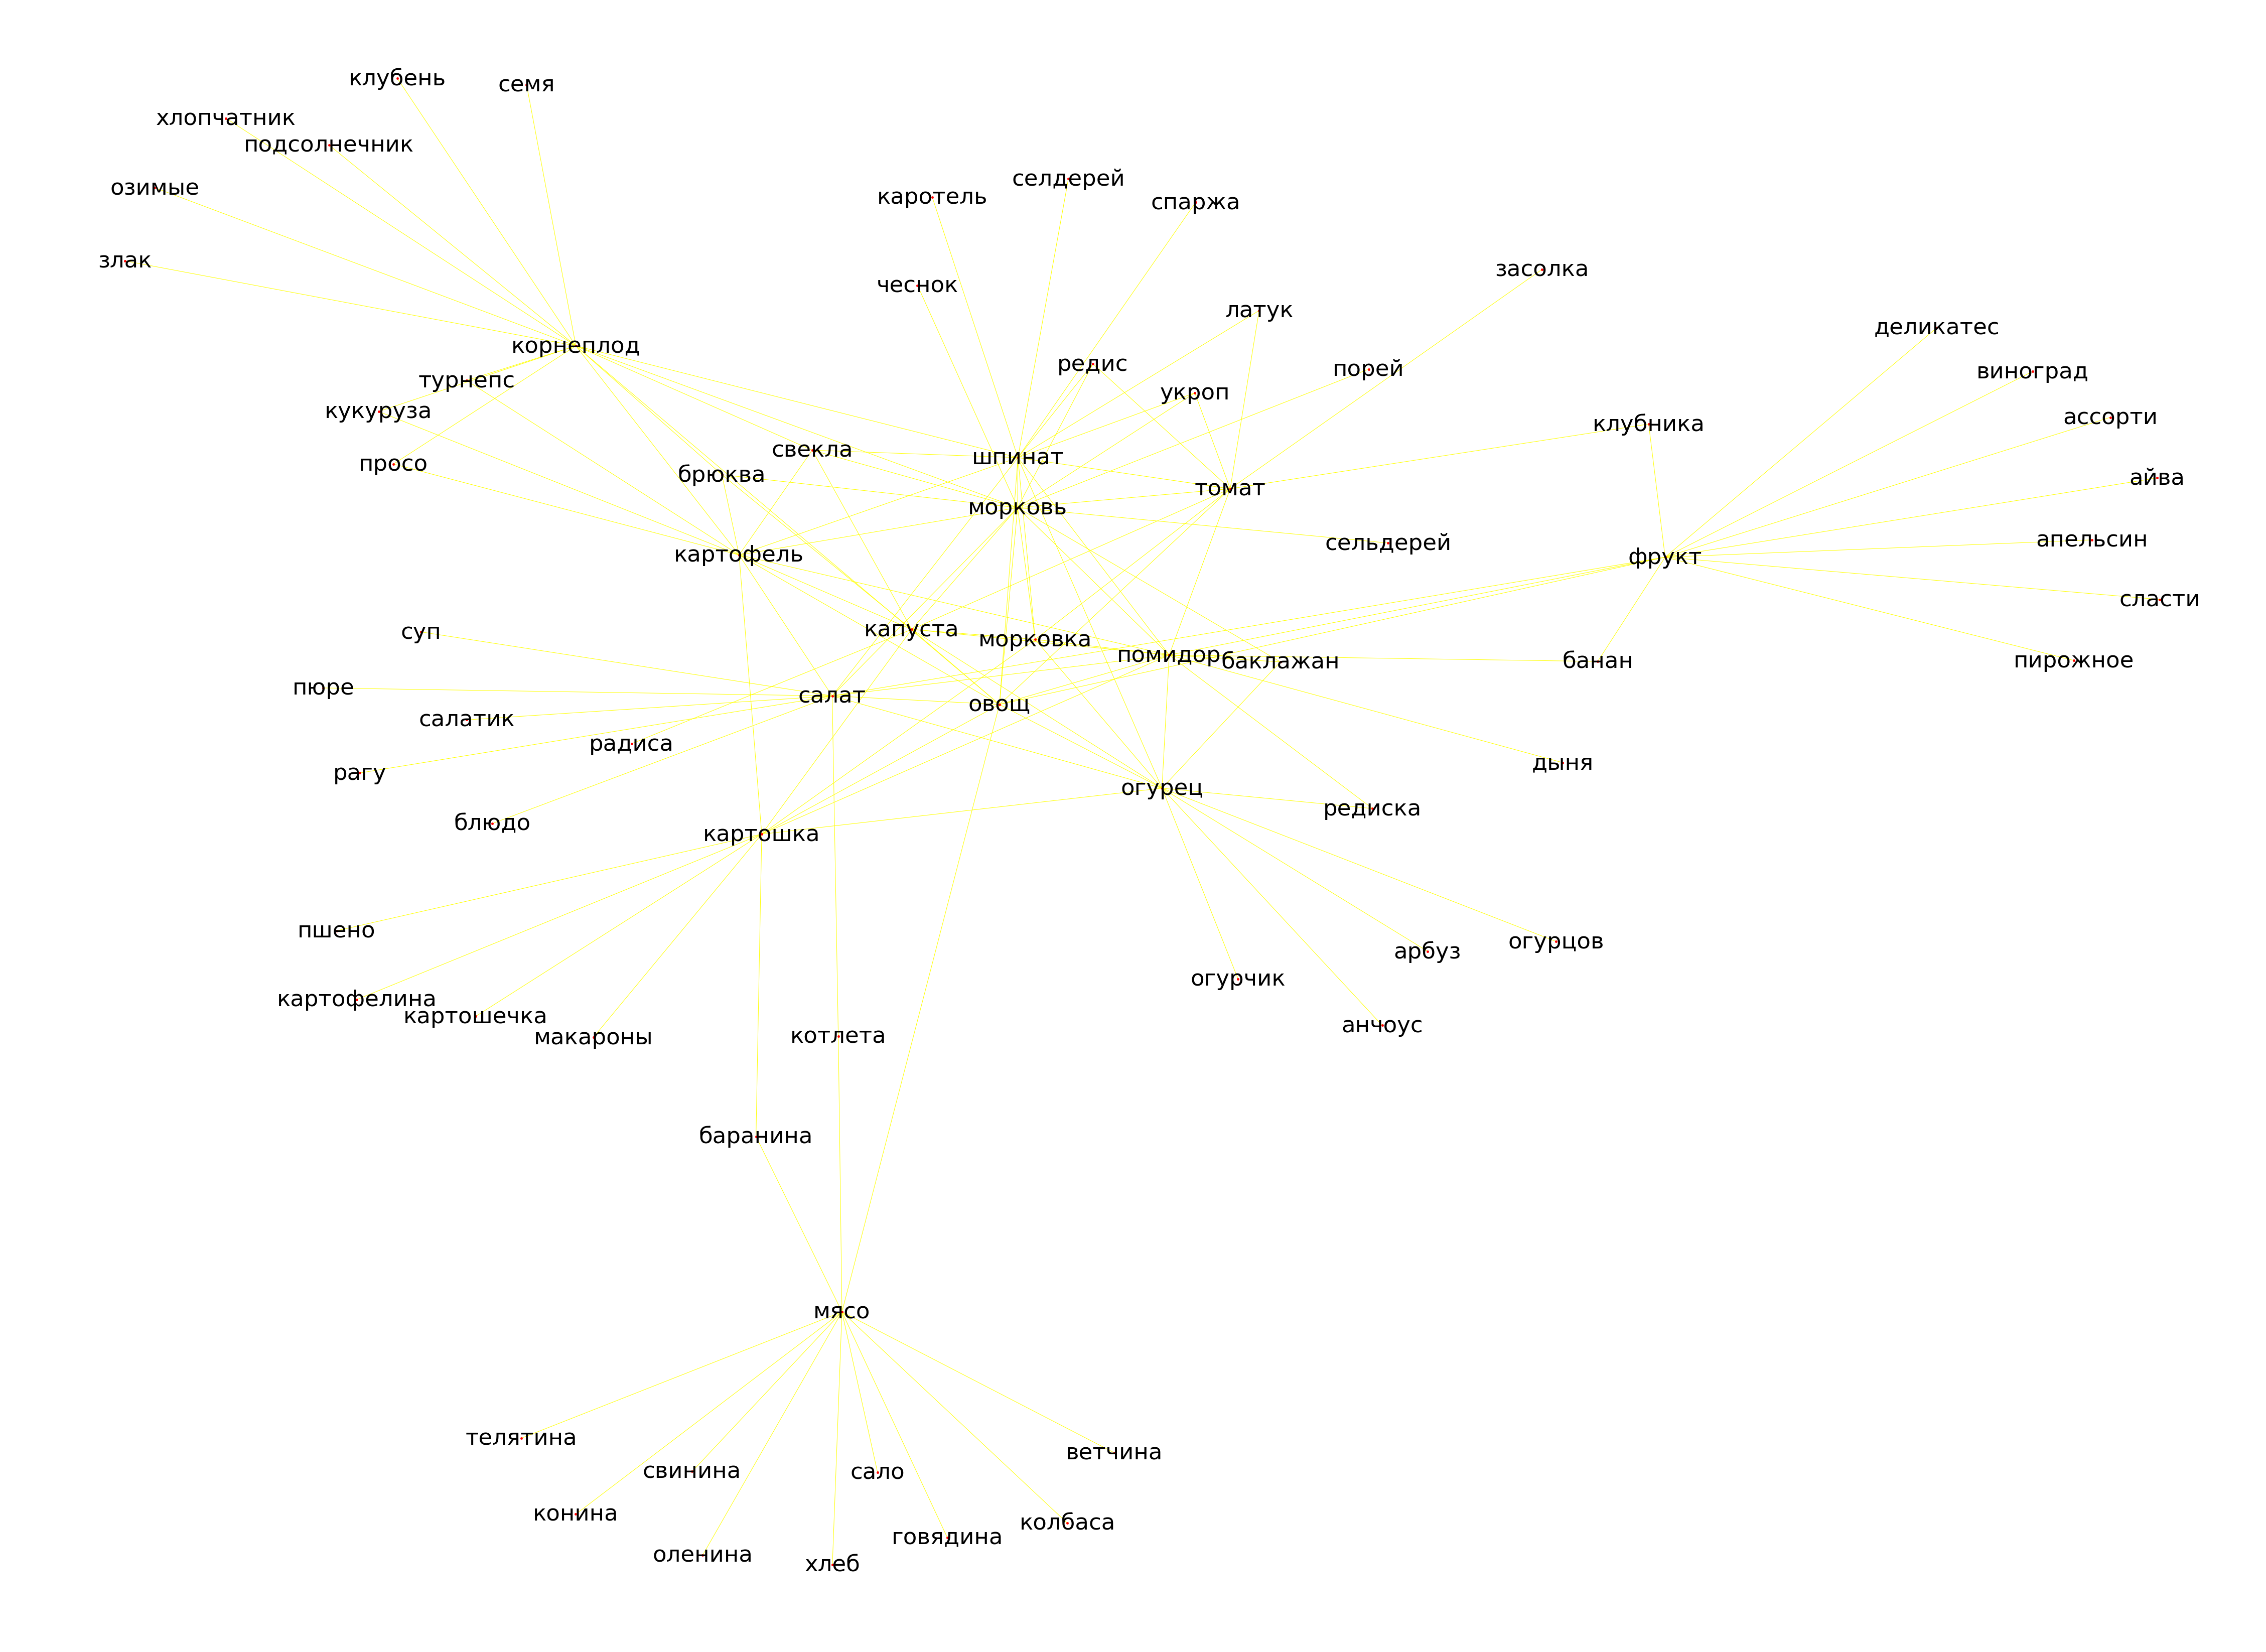

graph parameters
degree centrality:	морковь
closeness centrality:	овощ
betweenness centrality:	овощ
eigencentrality:	морковь
density:	0.05046948356807512
diameter:	4
radius:	2
clustering:	0.19863972492648962
assortativity:	-0.4446444644464447



In [37]:
G = graphmaker(gl_list, w_list)
graphdrawer(G)
graphanalyzer(G)

In [38]:
commis(G)

frozenset({'арбуз', 'пюре', 'просо', 'брюква', 'редиска', 'кукуруза', 'селдерей', 'пшено', 'злак', 'подсолнечник', 'огурцов', 'огурчик', 'редис', 'латук', 'клубень', 'баклажан', 'салатик', 'картошечка', 'морковка', 'картошка', 'корнеплод', 'огурец', 'шпинат', 'турнепс', 'укроп', 'суп', 'овощ', 'томат', 'помидор', 'блюдо', 'чеснок', 'порей', 'озимые', 'капуста', 'дыня', 'хлопчатник', 'сельдерей', 'семя', 'засолка', 'макароны', 'каротель', 'картофель', 'анчоус', 'свекла', 'морковь', 'картофелина', 'радиса', 'спаржа', 'рагу', 'салат', 'клубника'})
frozenset({'баранина', 'мясо', 'оленина', 'сало', 'колбаса', 'телятина', 'свинина', 'ветчина', 'котлета', 'говядина', 'конина', 'хлеб'})
frozenset({'ассорти', 'сласти', 'айва', 'фрукт', 'банан', 'апельсин', 'виноград', 'пирожное', 'деликатес'})


В первом сообществе почти все слова, поэтому рассмотрим второе и третье. Во второе попали все слова из поля "мясо", появившиеся тут из-за высокой косинусной близости слов "овощ" и "мясо". В третье попали "сладости", за исключением тех, что с большей вероятностью выращиваются на огороде – типа дыни, клубники и арбуза – видимо, из-за своей связи с огородом они не выделились к сластям и остались с овощем.